Analisis de datos

In [1]:
from categorias import get_categorias
from medios import get_capturas_df, get_medios_path


df = get_capturas_df()
categorias = get_categorias(df)


In [2]:
df

,id,url,Timestamp,DescripcionEnEstudio,Medico_ID,TipoEstudio,Age,Sexo,file_exists_status
0,6153,Estudios/196/20201222/IMG_20201222_080548_0c71...,2020-12-22 08:05:48.483,LARINGE,3,1,56,M,False
1,6160,Estudios/196/20201222/IMG_20201222_080651_e066...,2020-12-22 08:06:51.740,DUODENO,3,1,56,M,False
2,6794,Estudios/209/20201226/IMG_20201226_094710_a2ac...,2020-12-26 09:47:10.640,RETRO-HERNIA,1,1,65,M,False
3,7255,Estudios/221/20201229/IMG_20201229_083337_9fcd...,2020-12-29 08:33:37.810,ESTOMAGO,3,1,56,F,False
4,7289,Estudios/221/20201229/IMG_20201229_090448_5932...,2020-12-29 09:04:48.220,ANGULO,3,4,56,F,False
...,...,...,...,...,...,...,...,...,...
36209,184594,Estudios/5456/20220806/IMG_20220806_110542_7c6...,2022-08-06 11:05:42.940,CUERPO-POLIPO NBI,1,1,68,F,False
36210,179600,Estudios/5339/20220723/IMG_20220723_080621_61e...,2022-07-23 08:06:21.550,ESOFAGO,3,1,33,F,False
36211,179614,Estudios/5339/20220723/IMG_20220723_080738_258...,2022-07-23 08:07:38.787,RETRO-FONDO,3,1,33,F,False
36212,179649,Estudios/5341/20220723/IMG_20220723_084338_1a4...,2022-07-23 08:43:38.827,ESOFAGO,3,1,30,M,False


In [3]:
categorias

,Categoria,Nombre
0,290,UNION EG
1,2,DUODENO
2,1,LARINGE
3,6,CIEGO
4,17,COLON SIGMOIDES
5,9,RECTO
6,7,COLON TRANSVERSO
7,8,CUERPO
8,28,ANTRO-PILORO
9,2226,COLONDERECHO


In [4]:


# categorias_dict = list(categorias.to_dict().values())[1] #,list(categorias.to_dict().values())[1]}
# categorias_dict

Librerias de tensorflow

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-02-12 22:17:04.683584: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-12 22:17:05.159945: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-12 22:17:05.159985: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-12 22:17:05.159989: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [6]:
medios_path = get_medios_path()
print(medios_path)

import pathlib
data_dir = pathlib.Path(medios_path)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

/home/franciscor/Gastroclub/EstudiosSeparados/
5613


UNION EG
/home/franciscor/Gastroclub/EstudiosSeparados/290/IMG_20211129_072146_72e51e3e-f495-464e-8f2d-f5aae2c3767a.Png


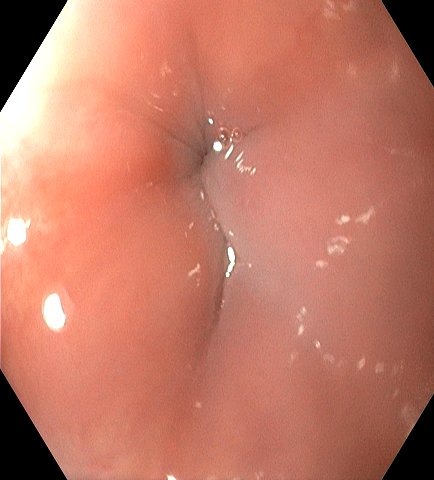

In [7]:
categoria = categorias.iloc[0]
print(categoria["Nombre"])
import random
imagen = list(data_dir.glob(f'{categoria["Categoria"]}/*'))
imagen_int = random.randint(0, len(imagen))

print (imagen[imagen_int])
PIL.Image.open(str(imagen[imagen_int]))


LARINGE
/home/franciscor/Gastroclub/EstudiosSeparados/1/IMG_20210407_110015_d1ec6c67-f052-447a-b2f2-4154986992b7.jpg


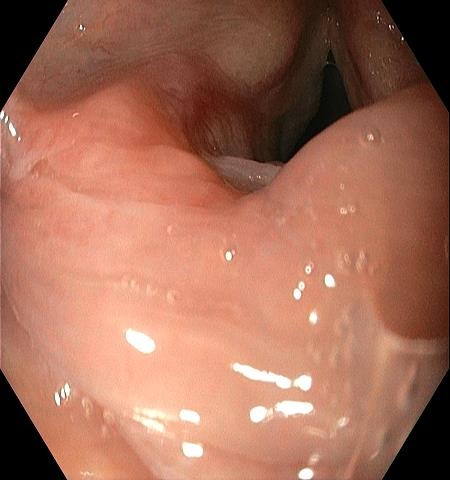

In [8]:
categoria = categorias.iloc[2]
print(categoria["Nombre"])
import random
imagen = list(data_dir.glob(f'{categoria["Categoria"]}/*'))
imagen_int = random.randint(0, len(imagen))

print (imagen[imagen_int])
PIL.Image.open(str(imagen[imagen_int]))

In [9]:
batch_size = 32
img_height = 200
img_width = 200

#TODO: pre-proceso de distintos tamanios

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12200 files belonging to 18 classes.
Using 9760 files for training.


2023-02-12 22:17:05.909749: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 22:17:05.924157: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 22:17:05.924362: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 22:17:05.924718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12200 files belonging to 18 classes.
Using 2440 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names[:10])

['1', '12', '16', '17', '19', '2', '2226', '25', '27', '28']


In [13]:
train_ds


<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
categorias


,Categoria,Nombre
0,290,UNION EG
1,2,DUODENO
2,1,LARINGE
3,6,CIEGO
4,17,COLON SIGMOIDES
5,9,RECTO
6,7,COLON TRANSVERSO
7,8,CUERPO
8,28,ANTRO-PILORO
9,2226,COLONDERECHO


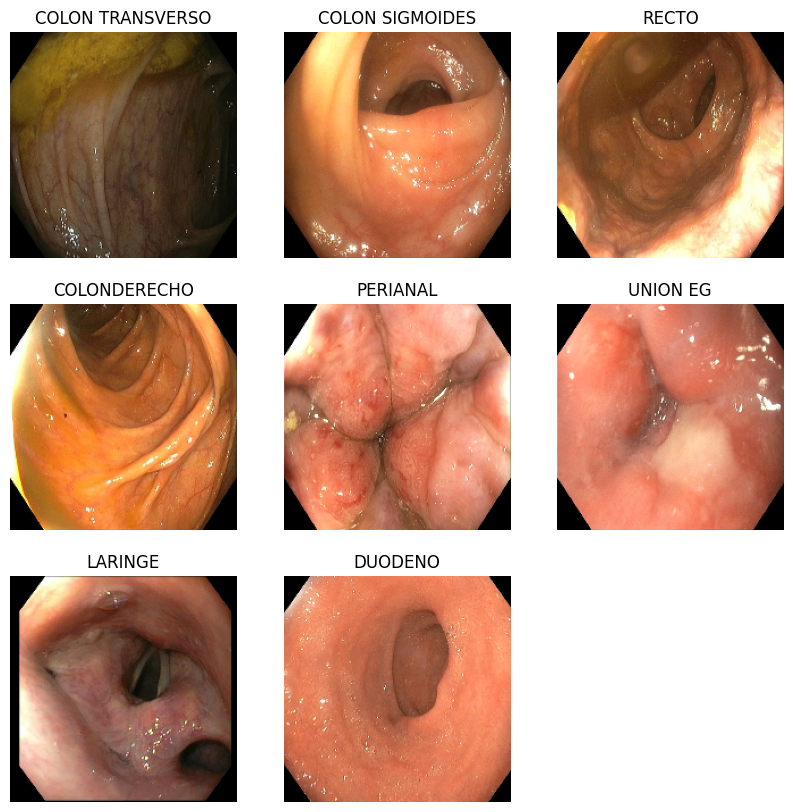

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        titulo = list(categorias[categorias['Categoria'] == int(class_names[labels[i]])]["Nombre"])[0]
        plt.title(titulo)
        plt.axis("off")


In [16]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 200, 200, 3)
(32,)


In [17]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)


In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()



In [ ]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot


# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=2
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
tf.keras.models.save_model(
    model,
    "/home/franciscor/output",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)